<center><img src="images/title.png" width="95%"/></center>
<center><a href="http://bit.ly/pybay-keras">bit.ly/pybay-keras</a></center>

What Do I Do?
------

<b><center>Professor @</center><b>
<center><img src="images/msds_logo.png" width="45%"/></center>

<center><img src="images/real_deep_learning.png" width="80%"/></center>

Keras - Neural Networks for humans
------

<center><img src="images/keras-logo-small.jpg" width="20%"/></center>

A high-level, intuitive API for Deep Learning.

Easy to define neural networks, then automatically handles execution.

A simple, modular interface which allows focus on learning and enables fast experimentation.

Goals
-----

- General introduction to Deep Learning
- Overview of Keras library
- An end-to-end example in Keras 

Anti-Goals
-----

- Understanding of Deep Learning
- Building neural networks from scratch
- A complete survey of keras library

Deep Learning 101
-----
<center><img src="images/neural_nets.jpg" width="75%"/></center>

Deep Learning (DL) are Neural networks (NN) with >1 hidden layer
-------

<center><img src="images/neural-networks-layers.jpg" width="80%"/></center>

Neural Networks are Nodes & Edges
------
<center><img src="images/sum.png" width="75%"/></center>

Nonlinear function allows learning of nonlinear relationships
------

<center><img src="images/function_3.png" width="80%"/></center>

Groups of nodes all the way down
------

<center><img src="images/layers.png" width="75%"/></center>

Deep Learning isn't magic, it is just very good at finding patterns
------

<center><img src="images/features.png" width="80%"/></center>

Deep Learning has fewer steps than traditional Machine Learning
------

<center><img src="images/traditional-ml-deep-learning-2.png" width="100%"/></center>

If you want to follow along…
-----

GitHub repo: [bit.ly/pybay-keras](http://bit.ly/pybay-keras)

If you want to type along…
------

1. Run a local Jupyter Notebook
1. [Binder](https://mybinder.org/v2/gh/brianspiering/keras-intro/master): In-Browser Jupyter Notebook
1. [Colaboratory](https://colab.research.google.com/): "Google Docs for Jupyter Notebooks"

In [339]:
reset -fs

In [340]:
import keras

In [341]:
# What is the backend / execution engine?


In [342]:
keras.backend.backend()

'tensorflow'

<center><img src="images/tf_logo.jpg" width="70%"/></center>

An open-source software library for Machine Intelligence

Numerical computation using data-flow graphs (DFG)

TensorFlow: A great backend
------
A __very__ flexible architecture which allows you to do almost any numerical operation.

Then deploy the computation to CPUs or GPUs (one or more) across desktop, cloud, or mobile device. 
<center><img src="images/tf_features.png" width="38%"/></center>

MNIST handwritten digit database: <br> The “Hello World!” of Computer Vision
------

<center><img src="images/mnist-digits.png" width="80%"/></center>

<center><img src="images/MNIST-Matrix.png" width="100%"/></center>

<center><img src="images/MNIST_neuralnet_image.png" width="100%"/></center>

In [343]:
# Import data


In [344]:
from keras.datasets import mnist

In [345]:
# Setup train and test splits


In [346]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

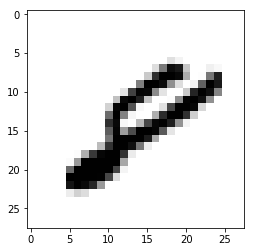

In [347]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

# protip - visually inspect your data
i = randint(0, x_train.shape[0])
pyplot.imshow(x_train[i], cmap='gray_r');

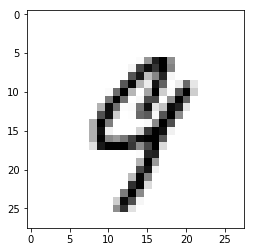

In [348]:
i = 27_074
pyplot.imshow(x_train[i], cmap='gray_r');

Is this thing a 4 or 9?

In [349]:
y_train[i]

9

Munge data
-----

<center><img src="images/mnist_keras.png" width="75%"/></center>

Convert image matrix into vector to feed into first layer 

In [350]:
# Munge Data


In [351]:
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32') # Cast as 32 bit integers
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32') # Cast as 32 bit integers
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

In [352]:
# Convert class vectors to binary class matrices


In [353]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [354]:
# Import the most common type of neural network


In [355]:
from keras.models import Sequential

In [356]:
# Define model instance


In [357]:
model = Sequential()

In [358]:
# Import the most common type of network layer, fully interconnected


In [359]:
from keras.layers import Dense

RTFM - https://keras.io/layers/

<center><img src="images/dense.png" width="55%"/></center>

In [360]:
# Define input layer


In [361]:
layer_input = Dense(units=512,            # Number of nodes
                    activation='sigmoid', # The nonlinearity
                    input_shape=(image_size,)) 
model.add(layer_input)

In [362]:
# Define another layer


In [363]:
model.add(Dense(units=512, activation='sigmoid'))

In [364]:
# Define output layers


In [365]:
layer_output = Dense(units=10,             # Number of digits (0-9)
                     activation='softmax') # Convert neural activation to probability of category

model.add(layer_output)

In [366]:
# Print summary of model architecture


In [367]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [368]:
# Add training paramters to architecture


In [369]:
# Yes - we compile the model to run it
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

In [370]:
# Train the model to learn weights


In [371]:
training = model.fit(x_train, 
                     y_train,
                     epochs=5, # Number of passes over complete dataset
                     verbose=True, 
                     validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 17s 312us/step - loss: 2.1620 - acc: 0.3160 - val_loss: 1.9285 - val_acc: 0.4772
Epoch 2/5
54000/54000 [==============================] - 15s 272us/step - loss: 1.5386 - acc: 0.6498 - val_loss: 1.1031 - val_acc: 0.7738
Epoch 3/5
54000/54000 [==============================] - 13s 245us/step - loss: 0.9209 - acc: 0.7743 - val_loss: 0.6921 - val_acc: 0.8255
Epoch 4/5
54000/54000 [==============================] - 15s 284us/step - loss: 0.6692 - acc: 0.8217 - val_loss: 0.5246 - val_acc: 0.8690
Epoch 5/5
54000/54000 [==============================] - 15s 283us/step - loss: 0.5523 - acc: 0.8482 - val_loss: 0.4430 - val_acc: 0.8845


<center><img src="images/waiting.jpg" width="55%"/></center>

In [372]:
# Let's see how well our model performs


In [373]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 1s 79us/step
Test loss: 0.494
Test accuracy: 86.230%


Keras' Other Features
-----

- Common built-in functions (e.g., activation functions and optimitizers)
- Convolutional neural network (CNN or ConvNet)
- Recurrent neural network (RNN) & Long-short term memory (LSTM)
- Pre-trained models

Summary
-----

- Keras is designed for human beings, not computers.
- Easier to try out Deep Learning (focus on the __what__, not the __how__).
- Simple to define neural networks.

<center><img src="images/twitter.png" width="100%"/></center>

Futher Study - Keras
--------

- [Keras docs](https://keras.io/)
- [Keras blog](https://blog.keras.io/)
- Keras courses
    - [edX](https://www.edx.org/course/deep-learning-fundamentals-with-keras)
    - [Coursera](https://www.coursera.org/lecture/ai/keras-overview-7GfN9)

Futher Study - Deep Learning
--------

- Prerequisites: Linear Algebra, Probability, Machine Learning
- [fast.ai Course](http://www.fast.ai/)
- [Deep Learning Book](http://www.deeplearningbook.org/)

<center><img src="images/thank-you-and-any-questions-3.png" width="100%"/></center>

Bonus Material
--------

In [389]:
from keras.datasets import fashion_mnist

In [390]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

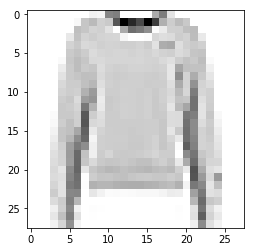

In [391]:
pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='gray_r');

In [392]:
# Define CNN model

# Redefine input dimensions to make sure conv works
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [393]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [394]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [398]:
# Define model
model = Sequential()
model.add(Conv2D(32, 
         kernel_size=(3, 3),
         activation='relu',
         input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [401]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [402]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',a
              metrics=['accuracy'])

SyntaxError: invalid syntax (<ipython-input-402-d99bd37e4570>, line 3)

In [403]:
# Define training
training = model.fit(x_train, 
                     y_train,
                     epochs=1,
                     verbose=True, 
                     validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 171s 3ms/step - loss: 0.4744 - acc: 0.8259 - val_loss: 0.4301 - val_acc: 0.8398


In [404]:
loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 8s 826us/step
Test loss: 0.448
Test accuracy: 83.590%


What is `keras`?    
-----

<center><img src="https://www.thevintagenews.com/wp-content/uploads/2017/08/a-drinking-horn-from-the-16th-century-known-as-the-roordahuizum-drinking-horn-on-display-in-the-frisian-museum-at-leeuwarden-640x360.jpg" width="75%"/></center>

Keras (κέρας) means horn in Greek. 

It is a reference to a literary image from ancient Greek and Latin literature.

First found in the Odyssey, where dream spirits (Oneiroi, singular Oneiros) are divided between those who deceive men with false visions, who arrive to Earth through a gate of ivory, and those who announce a future that will come to pass, who arrive through a gate of horn. 

It's a play on the words κέρας (horn) / κραίνω (fulfill), and ἐλέφας (ivory) / ἐλεφαίρομαι (deceive).

[Source](https://keras.io/#why-this-name-keras)

<br>